In [57]:
import scipy
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
data = pd.read_csv('hafas_vbb.csv', index_col=0)
data.iloc[100:150]

,latitude,longitude,min travel time,shortest trip
100,52.517143,13.428571,498.374473,U Strausberger Platz (Berlin) > S+U Alexanderp...
101,52.517143,13.421429,339.822951,Alexanderstr. (Berlin) > U Alexanderplatz [Bus]
102,52.517143,13.414286,269.174417,U Klosterstr. (Berlin) > S+U Alexanderplatz (B...
103,52.517143,13.407143,515.663726,Nikolaiviertel (Berlin) > Berliner Rathaus (Be...
104,52.517143,13.400000,298.542892,Lustgarten (Berlin) > S+U Alexanderplatz Bhf/M...
105,52.520000,13.500000,770.360726,Betriebshof Lichtenberg (Berlin) > U Magdalene...
106,52.520000,13.492857,1263.203353,Josef-Orlopp-Str./Gewerbegebiet(Berlin) > U Ma...
107,52.520000,13.485714,1325.847033,Josef-Orlopp-Str./Vulkanstr. (Berlin) > U Magd...
108,52.520000,13.478571,709.729619,Loeperplatz (Berlin) > S+U Frankfurter Allee (...
109,52.520000,13.471429,924.199691,Scheffelstr./Paul-Junius-Str. (Berlin) > U Fra...


In [59]:
def f(lat, lon):
    ret = data[(data['longitude']==lon) & (data['latitude']==lat)]['min travel time'].iloc[0]        
    return ret

# f(52.508708, 13.473981)

In [60]:
points = data[['latitude','longitude']].to_numpy()
values = data[['min travel time']].to_numpy().squeeze()
values = np.nan_to_num(values, posinf=3000.0, neginf=3000.0)

In [61]:
bottomleft = np.min(points, axis=0)
topright = np.max(points, axis=0)
NUM_INTERPOLATED_POINTS = 1000j
grid_x, grid_y = np.mgrid[bottomleft[0]:topright[0]:NUM_INTERPOLATED_POINTS, bottomleft[1]:topright[1]:NUM_INTERPOLATED_POINTS]

In [62]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

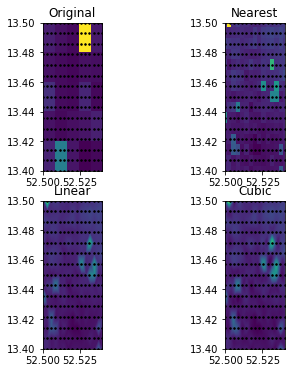

In [63]:
map_extent = (bottomleft[0],topright[0],bottomleft[1],topright[1])
plt.subplot(221)
grid_0 = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        grid_0[i,j] = f(points[5*i+j, 0], points[5*i+j, 1])
plt.imshow(grid_0.T, extent=map_extent, origin='upper')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=map_extent, origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=map_extent, origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=map_extent, origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

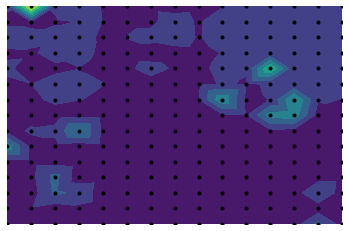

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(grid_x,grid_y,grid_z1)
plt.plot(points[:,0],points[:,1],'k.')
plt.axis('off')
plt.savefig('./overlay.png', bbox_inches='tight')

In [65]:
np.save('./grid_z2.npy', grid_z2)